In [6]:
from OF_trigger import *

sampling_frequency = 3906250


template = np.load("../templates/template_K_alpha_no_baseline.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
trace_path = "/ceph/dwong/trigger_samples/traces_energy_0.zst"
# Parameters

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)

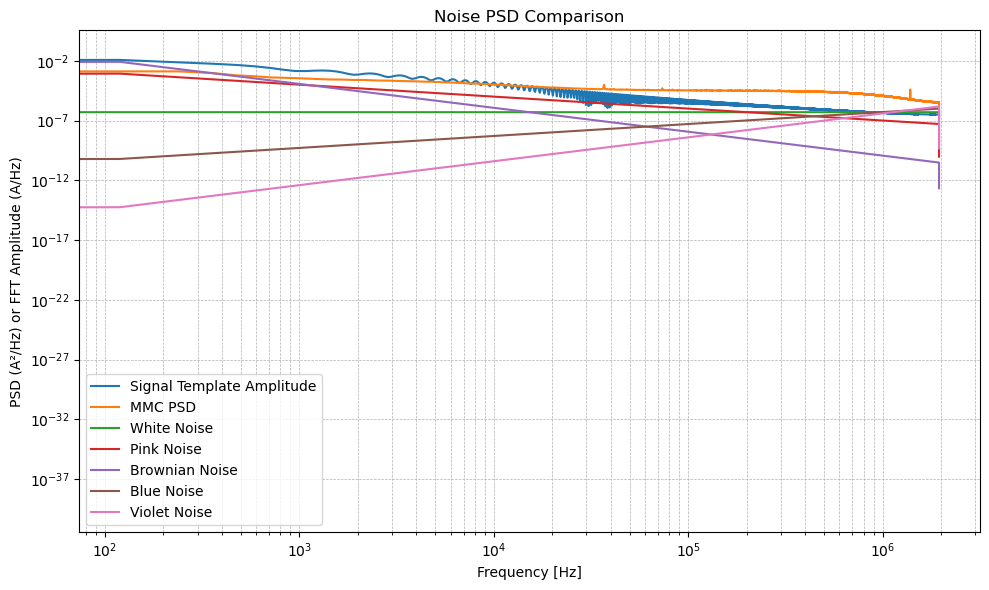

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq
from scipy.interpolate import interp1d
import os

# === Parameters ===
sampling_rate = 3_906_250.0  # Updated sampling frequency
template_path = "../templates/template_K_alpha_tight.npy"
mmc_path = "../templates/noise_psd_from_MMC.npy"
color_noise_dir = "../templates"
noise_types = ['white', 'pink', 'brownian', 'blue', 'violet']

# === Load signal template and compute amplitude spectral density ===
if not os.path.exists(template_path):
    raise FileNotFoundError(f"Signal template not found at: {template_path}")

signal = np.load(template_path)
N = len(signal)
frequencies = rfftfreq(N, d=1.0 / sampling_rate)
fft_amplitude_density = np.abs(rfft(signal)) / np.sqrt(sampling_rate * N)

# === Load MMC PSD ===
if not os.path.exists(mmc_path):
    raise FileNotFoundError(f"MMC PSD not found at: {mmc_path}")

mmc_psd = np.load(mmc_path)
if len(mmc_psd) != len(frequencies):
    original_freq = np.linspace(frequencies[0], frequencies[-1], len(mmc_psd))
    mmc_psd = interp1d(original_freq, mmc_psd, bounds_error=False, fill_value="extrapolate")(frequencies)

# === Load theoretical colored noise PSDs ===
psds = {"Signal Template Amplitude": fft_amplitude_density,
        "MMC PSD": mmc_psd}

for noise in noise_types:
    file_path = os.path.join(color_noise_dir, f"noise_psd_{noise}.npy")
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Missing PSD file for {noise}: {file_path}")
    
    data = np.load(file_path)
    
    # Support either direct PSD (1D) or (freq, psd) tuple (2D)
    if data.ndim == 2 and data.shape[0] == 2:
        color_freqs, color_psd = data
    else:
        color_freqs = frequencies  # assume pre-aligned
        color_psd = data

    # Interpolate if needed
    if not np.allclose(color_freqs, frequencies):
        interp = interp1d(color_freqs, color_psd, bounds_error=False, fill_value="extrapolate")
        color_psd = interp(frequencies)
    
    psds[f"{noise.capitalize()} Noise"] = color_psd

# === Plot all together ===
plt.figure(figsize=(10, 6))

for label, psd_vals in psds.items():
    plt.loglog(frequencies, psd_vals, label=label)

plt.title("Noise PSD Comparison")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD (A²/Hz) or FFT Amplitude (A/Hz)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


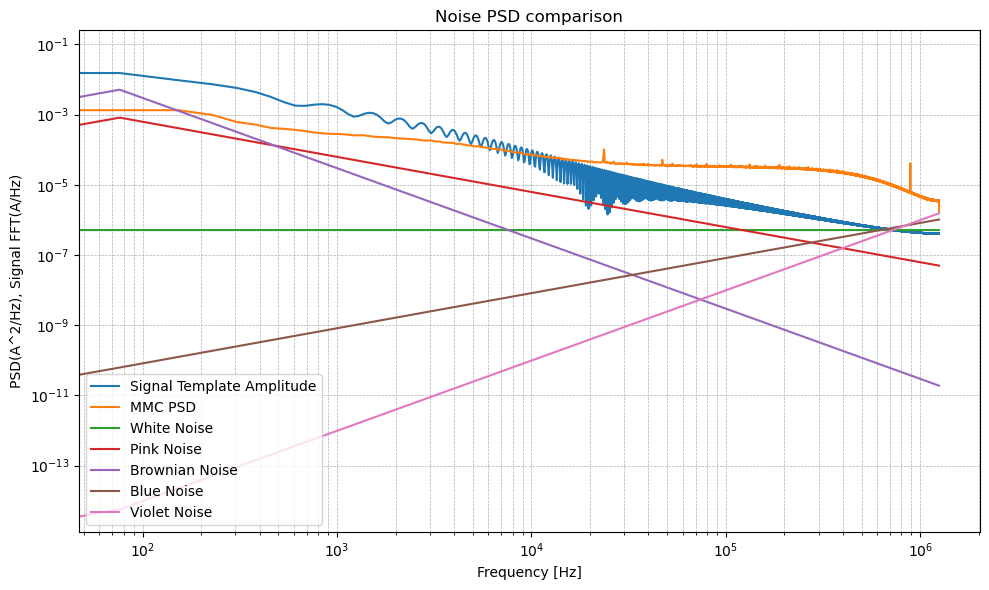

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq
from scipy.interpolate import interp1d
import os

# === Parameters ===
sampling_rate = 2_500_000.0
template_path = "../templates/template_K_alpha_tight.npy"
mmc_path = "../templates/noise_psd_from_MMC.npy"
color_noise_dir = "../templates"
noise_types = ['white', 'pink', 'brownian', 'blue', 'violet']

# === Load signal template and compute amplitude spectral density ===
if not os.path.exists(template_path):
    raise FileNotFoundError(f"Signal template not found at: {template_path}")

signal = np.load(template_path)
N = len(signal)
frequencies = rfftfreq(N, d=1.0 / sampling_rate)
fft_amplitude_density = np.abs(rfft(signal)) / np.sqrt(sampling_rate * N)

# === Load MMC PSD ===
if not os.path.exists(mmc_path):
    raise FileNotFoundError(f"MMC PSD not found at: {mmc_path}")

mmc_psd = np.load(mmc_path)
if len(mmc_psd) != len(frequencies):
    original_freq = np.linspace(frequencies[0], frequencies[-1], len(mmc_psd))
    mmc_psd = interp1d(original_freq, mmc_psd, bounds_error=False, fill_value="extrapolate")(frequencies)

# === Load theoretical colored noise PSDs ===
psds = {"Signal Template Amplitude": fft_amplitude_density,
        "MMC PSD": mmc_psd}

for noise in noise_types:
    file_path = os.path.join(color_noise_dir, f"noise_psd_{noise}.npy")
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Missing PSD file for {noise}: {file_path}")
    
    data = np.load(file_path)
    color_freqs = 3_906_250.0
    color_psd = data

    
    
    psds[f"{noise.capitalize()} Noise"] = color_psd

# === Plot all together ===
plt.figure(figsize=(10, 6))

for label, psd_vals in psds.items():
    plt.loglog(frequencies, psd_vals, label=label)

plt.title("Noise PSD comparison")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD(A^2/Hz), Signal FFT(A/Hz)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()